## Final Project Submission

* Student name: Laura Lewis
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Joe San Pietro
* Blog post URL:
***

Add table of contents with links

# Introduction

Project aims, data source, etc.

***
# Obtaining the data

In this section...

Source of data:...

In [474]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar

The most recent Kickstarter data from https://webrobots.io/kickstarter-datasets/ (from 14 March 2019) is stored in 56 separate csv files. The code below creates a list of all csv files beginning with 'Kickstarter' and concatenates them into one dataframe:

In [285]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/Kickstarter*.csv')], ignore_index = True)

In [286]:
df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,USD,1391899046,False,NaN,1.0,200.0,287514992,NaN,False,NaN,1388011046,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,NaN,"{""key"":""assets/011/625/534/5bea1760d7f20943c4c...",802.0,"{""id"":822687,""project_id"":822687,""state"":""inac...",new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",802.0,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,USD,1551801611,False,NaN,1.0,400.0,385129759,NaN,False,NaN,1550073611,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,NaN,"{""key"":""assets/024/033/030/dea4e3901d10195b035...",2259.0,"{""id"":3665299,""project_id"":3665299,""state"":""in...",princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2259.0,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,USD,1480607930,False,NaN,1.0,27224.0,681033598,NaN,False,NaN,1478012330,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,NaN,"{""key"":""assets/014/262/672/97944960ba30239051d...",29638.0,"{""id"":2730508,""project_id"":2730508,""state"":""in...",their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",29638.0,international


The resulting dataframe contains 209,222 projects.

In [287]:
len(df)

209222

***
# Scrubbing the data

In this section...

**Inspecting and dropping columns**

In [288]:
# Checking the columns
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

Description of each column...

- 
- disable_communication - whether or not a project owner disabled communication with their backers
- is_starrable - whether or not a project has been starred (liked and saved) by users

In [289]:
# Checking for duplicates of individual projects
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")

Of the 209222 projects in the dataset, there are 26958 which are listed more than once.


Duplicates are an issue in this dataset and will need to be dealt with. Further cleaning of the data will help clarify which duplicates, if any, need to be removed.

In [290]:
# Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 

Some columns contain very few nun-null entries, and can be dropped:

In [291]:
# Dropping columns that are mostly null
df.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis=1, inplace=True)

Other columns are not useful for the purposes of this project, and can also be dropped:

- converted_pledged_amount - most currencies are converted into USD in this column, but not all. Instead, the 'usd_pledged' column will be used as these all use the same currency (the dollar).
- creator - most projects are by different people, and so this cannot be usefully used to group or categorise projects, and is not useful in a machine learning context.
- currency - all currency values will be used as/converted to dollars, so that they can be evaluated together. It is not necessary to keep the original record because of this, and because it will be highly correlated with country (which will be kept).
- currency_symbol - as above.
- currency_trailing_code - as above.
- current_currency - as above.
- fx_rate - this is used to create 'converted_pledged_amount' from 'pledged', but does not always convert to dollars so can be dropped in favour of 'static_usd_rate' which always converts to dollars.
- photo - image processing/computer vision will not be used in this project.
- pledged - data in this column is stored in native currencies, so this will be dropped in favour of 'usd_pledged' which is all in the same currency (dollars).
- profile - this column contains a combination of information from other columns (e.g. id, state, dates, url).
- slug - this is simply the 'name' column with hyphens instead of spaces.
- source_url - the sites that the rows were each scraped from is not useful for building a model, as each is unique to an id.
- spotlight - projects can only be spotlighted after they are already successful, so this will be entirely correlated with successful projects.
- state_changed_at - this is the same as deadline for most projects. The only exceptions are for projects which were cancelled before their deadline, but they will not be included in this analysis.
- urls - as with source_url.
- usd_type - it is unclear what this column means, but it is unlikely to be necessary since all currency values will be converted to dollars, and other currency information has been dropped.

In [292]:
# Dropping columns that aren't useful
df.drop(['converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'state_changed_at', 'urls', 'usd_type'], axis=1, inplace=True)

**Converting datetime columns**

Columns containing dates are currently stored in unix time, and need to be converted to datetime. Because they have been converted from unix, all times are in UTC/GMT.

In [293]:
# Converting dates from unix to datetime
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [294]:
print(f"The dataset contains projects added to Kickstarter between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 22 April 2009 and 14 March 2019.


Individual columns will now be pre-processed, and additional features engineered, where necessary.

**Blurb**

Natural language processing is beyond the scope of this project. The length of the blurbs written by project creators will be calculated though, in case this is useful for the model (e.g. people preferring to read shorter or longer blurbs when choosing what to fund). The original blurb variable will then be dropped.

In [295]:
# Count length of each blurb
df['blurb_length'] = df['blurb'].str.split().str.len()

# Drop blurb variable
df.drop('blurb', axis=1, inplace=True)

**Category**

The category variable is currently stored as a string, although it was clearly originally a dictionary. The example below shows that each project has both a category (e.g. games) and a sub-category (e.g. tabletop games). Both will be extracted.

In [296]:
# Example category value
df.iloc[0]['category']

'{"id":43,"name":"Rock","slug":"music/rock","position":17,"parent_id":14,"color":10878931,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/rock"}}}'

In [326]:
# Extracting the relevant sub-category section from the string
f = lambda x: x['category'].split('/')[1].split('","position')[0]
df['sub_category'] = df.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df['category'] = df.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
df['category'] = df.apply(f, axis=1)

In [330]:
# Counting the number of unique categories
print(f"There are {df.category.nunique()} unique categories and {df.sub_category.nunique()} unique sub-categories.")

There are 15 unique categories and 145 unique sub-categories.


**Disable_communication**

99.7% of project owners did not disable communication with their backers (unsurprisingly). Because nearly all projects have the same value for this variable, it will be dropped as it does not provide much information.

In [332]:
# Checking the proportions of each category
df.disable_communication.value_counts(normalize=True)

False    0.997022
True     0.002978
Name: disable_communication, dtype: float64

In [333]:
df.drop('disable_communication', axis=1, inplace=True)

**Goal**

The goal amount of funding for each project is currently recorded in native currencies. In order to allow for fair comparisons between projects, goal will be converted into dollars (as amount pledged already is).

In [334]:
# Calculate new column 'usd_goal' as goal * static_usd_rate
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

In [335]:
# Dropping goal and static_usd_rate
df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

**Is_starrable**

Only 3.3% of projects were starred by users. Although this is only a very small proportion, whether or not a project was liked and saved by users is likely to be informative about whether or not a project was successful, so the variable will be kept.

In [337]:
# Figure out what this is, and do a count_values() to figure out whether it's worth including or mostly FALSE
df.is_starrable.value_counts(normalize=True)

False    0.967403
True     0.032597
Name: is_starrable, dtype: float64

**Location**

The location field contains the town/city that a project originates from, as well as the country. There are a large number (15,235) of unique locations. Because the country is already recorded separately in the country field, and there are such a large number of unique categories (making one-hot encoding not useful, particularly as there are likely to be a lot of smaller towns and cities with very few projects), the column will be dropped.

In [338]:
# Example location value
df.iloc[0]['location']

'{"id":2379574,"name":"Chicago","slug":"chicago-il","short_name":"Chicago, IL","displayable_name":"Chicago, IL","localized_name":"Chicago","country":"US","state":"IL","type":"Town","is_root":false,"urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/chicago-il","location":"https://www.kickstarter.com/locations/chicago-il"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1552595044.c1041c6bca69b0b72738f3b9504ebf921b3e5e0e&woe_id=2379574"}}}'

In [339]:
# Counting the number of unique locations
df.location.nunique()

15235

In [340]:
# Dropping location
df.drop('location', axis=1, inplace=True)

**Name**

The length of project names will be calculated, in case this is useful for the model. The original name variable will then be dropped.

In [341]:
# Count length of each name
df['name_length'] = df['name'].str.split().str.len()
# Drop name variable
df.drop('name', axis=1, inplace=True)

**Usd_pledged**

This column requires rounding to two decimal places.

In [342]:
df['usd_pledged'] = round(df['usd_pledged'],2)

**Additional calculated features**

Additional features can be calculated from the existing features, which may also help to predict whether a project is successfully funded. The features to be added are: time from creation to launch, campaign length, launch day of week, deadline day of week, launch month, deadline month, launch time of day, deadline time of day. Original datetime values will be kept in for now for EDA purposes, but will be removed later, before modeling.

In [343]:
# Time between creating and launching a project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
# Or could show as number of hours:
# df['creation_to_launch_hours'] = df['launched_at'] - df['created_at']
# df['creation_to_launch_hours'] = df['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h') 

# Campaign length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

# Launch day of week
df['launch_day'] = df['launched_at'].dt.weekday_name

# Deadline day of week
df['deadline_day'] = df['deadline'].dt.weekday_name

# Launch month
df['launch_month'] = df['launched_at'].dt.month_name()

# Deadline month
df['deadline_month'] = df['deadline'].dt.month_name()

In [344]:
# Launch time
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calculates bins from launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [345]:
# Deadline time
df['deadline_hour'] = df['deadline'].dt.hour # Extracting hour from deadline

def two_hour_deadline(row):
    '''Creates two hour bins from the deadline_hour column'''
    if row['deadline_hour'] in (0,1):
        return '12am-2am'
    if row['deadline_hour'] in (2,3):
        return '2am-4am'
    if row['deadline_hour'] in (4,5):
        return '4am-6am'
    if row['deadline_hour'] in (6,7):
        return '6am-8am'
    if row['deadline_hour'] in (8,9):
        return '8am-10am'
    if row['deadline_hour'] in (10,11):
        return '10am-12pm'
    if row['deadline_hour'] in (12,13):
        return '12pm-2pm'
    if row['deadline_hour'] in (14,15):
        return '2pm-4pm'
    if row['deadline_hour'] in (16,17):
        return '4pm-6pm'
    if row['deadline_hour'] in (18,19):
        return '6pm-8pm'
    if row['deadline_hour'] in (20,21):
        return '8pm-10pm'
    if row['deadline_hour'] in (22,23):
        return '10pm-12am'
    
df['deadline_time'] = df.apply(two_hour_deadline, axis=1) # Calculates bins from launch_time

df.drop('deadline_hour', axis=1, inplace=True)

**Checking for null values**

In [346]:
df.isna().sum()

backers_count              0
category                   0
country                    0
created_at                 0
deadline                   0
id                         0
is_starrable               0
launched_at                0
staff_pick                 0
state                      0
usd_pledged                0
blurb_length               8
sub_category               0
usd_goal                   0
name_length                0
creation_to_launch_days    0
campaign_days              0
launch_day                 0
deadline_day               0
launch_month               0
deadline_month             0
launch_time                0
deadline_time              0
dtype: int64

There are eight projects without a blurb_length, i.e. without a blurb. These can be replaced with a length of 0.

In [347]:
# Replacing null values for blurb_length with 0
df.blurb_length.fillna(0, inplace=True)

In [348]:
# Confirming there are no null values remaining
df.isna().sum().sum()

0

**Dropping rows**

This project aims to predict whether projects succeed or fail. The dataset also includes canceled, live (i.e. not yet finished) and suspended projects. These will now be removed.

In [349]:
# Number of projects of different states
df.state.value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

In [350]:
# Dropping projects which are not successes or failures
df = df[df['state'].isin(['successful', 'failed'])]

In [351]:
# Confirming that the most recent deadline is the day on which the data was scraped, i.e. there are no projects which have yet to be resolved into either successes or failures
max(df.deadline)

Timestamp('2019-03-14 04:06:01')

**Dropping duplicates**

As demonstrated above, some projects are included in the dataset more than once. Duplicates will now be assessed and removed.

In [352]:
# Checking for duplicates of individual projects, and sorting by id
duplicates = df[df.duplicated(subset='id')]
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")
print(f"Of these, {len(df[df.duplicated()])} have every value in common between duplicates.")

Of the 192664 projects in the dataset, there are 23685 which are listed more than once.
Of these, 23674 have every value in common between duplicates.


In [353]:
# Dropping duplicates which have every value in common
df.drop_duplicates(inplace=True)

In [354]:
len(df)

168990

In [355]:
print(len(df[df.duplicated(subset='id')]), "duplicated projects remain.")
duplicated = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
duplicated

11 duplicated projects remain.


,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
197835,1675,games,NZ,2018-05-30 04:51:55,2018-12-18 04:00:00,122079667,False,2018-11-21 02:04:29,False,successful,200537.60,12.0,tabletop games,342.10,4,175,27,Wednesday,Tuesday,November,December,2am-4am,4am-6am
144698,1675,games,NZ,2018-05-30 04:51:55,2018-12-18 04:00:00,122079667,False,2018-11-21 02:04:29,False,successful,200710.36,12.0,tabletop games,342.40,4,175,27,Wednesday,Tuesday,November,December,2am-4am,4am-6am
124657,32,art,CA,2018-05-07 22:52:48,2018-05-30 01:00:00,123735637,False,2018-05-08 01:43:43,False,successful,669.56,13.0,illustration,466.97,10,0,22,Tuesday,Wednesday,May,May,12am-2am,12am-2am
106307,32,art,CA,2018-05-07 22:52:48,2018-05-30 01:00:00,123735637,False,2018-05-08 01:43:43,False,successful,669.10,13.0,illustration,466.65,10,0,22,Tuesday,Wednesday,May,May,12am-2am,12am-2am
105017,18,photography,FR,2017-11-06 23:50:45,2018-01-06 02:53:04,299750696,False,2017-12-02 02:53:04,False,successful,1654.77,18.0,photobooks,1423.46,8,25,35,Saturday,Saturday,December,January,2am-4am,2am-4am
191946,18,photography,FR,2017-11-06 23:50:45,2018-01-06 02:53:04,299750696,False,2017-12-02 02:53:04,False,successful,1661.61,18.0,photobooks,1429.34,8,25,35,Saturday,Saturday,December,January,2am-4am,2am-4am
39735,779,games,CA,2018-12-23 02:00:22,2019-03-02 03:00:00,395324593,False,2019-01-29 00:02:43,False,successful,10222.68,17.0,tabletop games,151.33,7,37,32,Tuesday,Saturday,January,March,12am-2am,2am-4am
102505,779,games,CA,2018-12-23 02:00:22,2019-03-02 03:00:00,395324593,False,2019-01-29 00:02:43,False,successful,10231.08,17.0,tabletop games,151.46,7,37,32,Tuesday,Saturday,January,March,12am-2am,2am-4am
31755,5,technology,HK,2018-03-15 11:39:29,2018-04-27 02:09:50,1188888346,False,2018-03-28 02:09:50,False,successful,1437.70,20.0,gadgets,1274.10,11,13,30,Wednesday,Friday,March,April,2am-4am,2am-4am
84748,5,technology,HK,2018-03-15 11:39:29,2018-04-27 02:09:50,1188888346,False,2018-03-28 02:09:50,False,successful,1437.92,20.0,gadgets,1274.30,11,13,30,Wednesday,Friday,March,April,2am-4am,2am-4am


Comparing rows for each duplicated project:

In [356]:
# Get list of index numbers for duplicated ids
dup_ids = duplicated.id.unique()
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index2 = duplicated[duplicated.id == i][1:2].index.values
    print(index1, index2)
    #print(duplicated.loc[index1] == duplicated.loc[index2]) # produces TypeError: Could not compare [None] with block values

[197835] [144698]
[124657] [106307]
[105017] [191946]
[39735] [102505]
[31755] [84748]
[204234] [69815]
[165028] [2380]
[195186] [198134]
[103127] [63824]
[165952] [58250]
[94567] [184176]


In [39]:
df.loc[197835] == df.loc[144698]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [40]:
df.loc[124657] == df.loc[106307]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [41]:
df.loc[105017] == df.loc[191946]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [42]:
df.loc[39735] == df.loc[102505]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [43]:
df.loc[31755] == df.loc[84748]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [44]:
df.loc[204234] == df.loc[69815]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [45]:
df.loc[165028] == df.loc[2380]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [46]:
df.loc[195186] == df.loc[198134]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [47]:
df.loc[103127] == df.loc[63824]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [48]:
df.loc[165952] == df.loc[58250]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

In [49]:
df.loc[94567] == df.loc[184176]

backers_count               True
category                    True
country                     True
created_at                  True
deadline                    True
id                          True
is_starrable                True
launched_at                 True
staff_pick                  True
state                       True
usd_pledged                False
blurb_length                True
sub_category                True
usd_goal                   False
name_length                 True
creation_to_launch_days     True
campaign_days               True
launch_day                  True
deadline_day                True
launch_month                True
deadline_month              True
launch_time                 True
deadline_time               True
dtype: bool

The results above show that for each pair of duplicates, there are differences in the usd_pledge and usd_goal columns. The differences are only in the order of a few cents or dollars, so it does not make much difference which one is kept. Therefore the second one of each pair will be dropped.

In [357]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

**Setting the index**

The id will now be set as the index.

In [358]:
# Setting the id column as the index
df.set_index('id', inplace=True)
df.head()

,backers_count,category,country,created_at,deadline,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
id,,,,,,,,,,,,,,,,,,,,,,
287514992,21,music,US,2013-12-21 21:01:30,2014-02-08 22:37:26,False,2013-12-25 22:37:26,False,successful,802.00,26.0,rock,200.0,4,4,45,Wednesday,Saturday,December,February,10pm-12am,10pm-12am
385129759,97,art,US,2019-02-08 21:02:48,2019-03-05 16:00:11,False,2019-02-13 16:00:11,False,successful,2259.00,9.0,mixed media,400.0,5,5,20,Wednesday,Tuesday,February,March,4pm-6pm,4pm-6pm
681033598,88,photography,US,2016-10-23 17:06:24,2016-12-01 15:58:50,False,2016-11-01 14:58:50,True,successful,29638.00,25.0,photobooks,27224.0,9,9,30,Tuesday,Thursday,November,December,2pm-4pm,2pm-4pm
1031782682,193,fashion,IT,2018-10-24 08:32:00,2018-12-08 22:59:00,False,2018-10-27 23:56:22,False,successful,49075.15,13.0,footwear,45461.0,5,4,42,Saturday,Saturday,October,December,10pm-12am,10pm-12am
904085819,20,technology,US,2015-03-07 05:35:17,2015-04-08 16:36:57,False,2015-03-09 16:36:57,False,failed,549.00,22.0,software,1000.0,4,2,30,Monday,Wednesday,March,April,4pm-6pm,4pm-6pm


***
# Exploring the data

In this section...

**How many projects have been launched on Kickstarter, how much money has been pledged, and how do succesful and failed projects differ?**

In [359]:
# Summary statistics for the numerical features
df.describe()

,backers_count,usd_pledged,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days
count,168979.000000,1.689790e+05,168979.000000,1.689790e+05,168979.000000,168979.000000,168979.000000
mean,140.068221,1.211097e+04,19.010759,4.109688e+04,5.709153,46.710645,32.643287
std,894.931802,8.373932e+04,4.982463,1.110957e+06,2.706210,127.597384,11.761523
min,0.000000,0.000000e+00,0.000000,1.000000e-02,1.000000,0.000000,1.000000
25%,3.000000,1.000000e+02,16.000000,1.500000e+03,4.000000,3.000000,30.000000
50%,25.000000,1.457000e+03,20.000000,5.000000e+03,6.000000,11.000000,30.000000
75%,85.000000,6.235000e+03,22.000000,1.329770e+04,8.000000,36.000000,34.000000
max,105857.000000,8.596475e+06,35.000000,1.523501e+08,27.000000,3304.000000,93.000000


In [360]:
print("Key stats:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df.usd_goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df.usd_pledged.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged)))

print("\nThe total number of successfuly or failed projects launched on Kickstarter is: {0:,}".format(len(df)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"The proportion of projects which were successfully funded is: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nThe average project fundraising goal is ${0:,.0f}".format(df.usd_goal.mean()))
print("The average amount pledged per project is ${0:,.0f}".format(df.usd_pledged.mean()))
print("The average amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged.mean()))
print("The average amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged.mean()))
      
print("\nThe average number of backers per project is", int(round(df.backers_count.mean(),0)))
print("The average number of days a campaign is run for is", int(round(df.campaign_days.mean(),0)))

Key stats:

The total amount of money that projects have aimed to raise is $6,944,509,112
The total amount of money pledged by backers is $2,046,500,420
The total amount of money pledged by backers to successful projects is $1,965,321,660

The total number of successfuly or failed projects launched on Kickstarter is: 168,979
The total number of projects which were successfully funded is: 94,779
The proportion of projects which were successfully funded is: 56%

The average project fundraising goal is $41,097
The average amount pledged per project is $12,111
The average amount pledged per successful project is $20,736
The average amount pledged per failed project is $1,094

The average number of backers per project is 140
The average number of days a campaign is run for is 33


The graphs below show the number of successful and failed projects launched on the site, and the median (due to the heavy positive skew) goal and pledged amount per project. Unsurprisingly, successful projects tend to have smaller (and therefore more realistic) goals - the median amount sought by successful projects is half that of failed projects. The differences in the median amount pledged per project are perhaps more surprising, however. Firstly, the median amount pledged per successful project is considerably higher than the median amount requested, suggesting that projects that meet their goal tend to go on to gain even more funding, and become 'over-funded'. Secondly, and on a related note, the difference between failed and successful companies is much larger in terms of amount pledged. Possibly once potential backers see that a project looks like it will be successful, they are more likely to fund it.

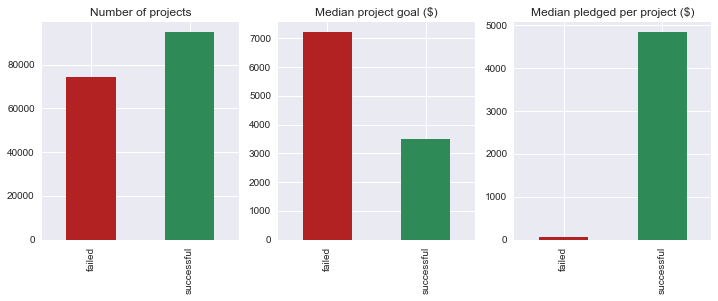

In [361]:
# Plotting the average amount pledged to successful and unsuccesful projects
fig, ax = plt.subplots(1,3, figsize=(12,4))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax[0], color=['firebrick', 'seagreen'])
ax[0].set_title('Number of projects')
ax[0].set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax[1], color=['firebrick', 'seagreen'])
ax[1].set_title('Median project goal ($)')
ax[1].set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax[2], color=['firebrick', 'seagreen'])
ax[2].set_title('Median pledged per project ($)')
ax[2].set_xlabel('')

plt.show()

**How has fundraising changed over time?**

The graph below shows the number of projects launched each month on Kickstarter from 2009 to 2019. The number of projects steadily grows from when the company was founded in 2009 up to the start of 2014. From 2012 Kickstarter started expanding into other countries, having launched initially in the US. Growth increased dramatically in 2014, and has remained at a high level since then, with a small decrease from 2015 to 2016. Seasonality is also hinted at, with fewer projects appearing to be launched in November. The second graph shows a similar story, with the cumulative amount pledged increasing more quickly from 2012 onwards.

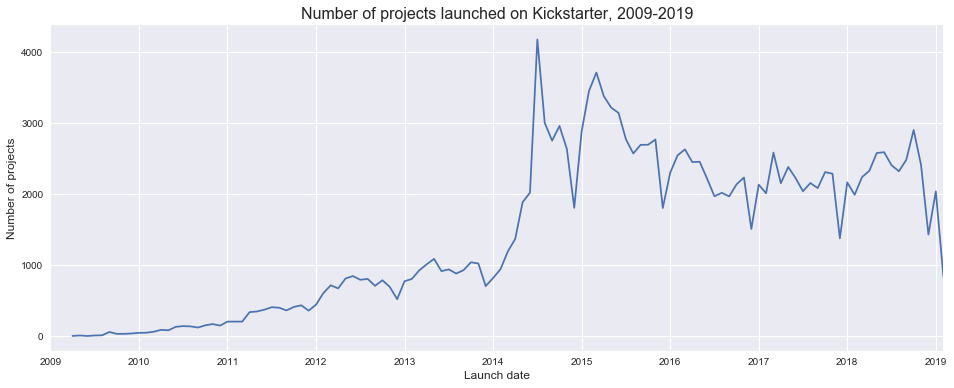

In [462]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2009-2019', fontsize=16)
plt.show()

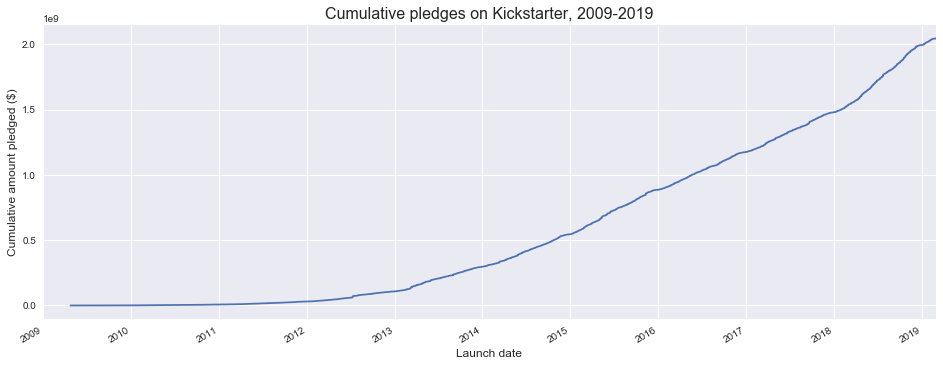

In [363]:
# Plotting the cumulative amount pledged on Kickstarter
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Cumulative amount pledged ($)', fontsize=12)
plt.title('Cumulative pledges on Kickstarter, 2009-2019', fontsize=16)
plt.show()

The table and graph below show the total and distribution of pledged amounts for each year 2009-2019. Again, the trend can be split into two phases, with a change in 2014. From 2014 onwards there was greater variation in the amounts pledged, with lower median amounts than the period 2009-2014, but generally higher mean amounts (with the exception of 2013) due to some very large projects.

In [364]:
print("Average amount pledged per project in each year, in $:")
print(round(df.set_index('launched_at').usd_pledged.resample('YS').mean(),2))

Average amount pledged per project in each year, in $:
launched_at
2009-01-01     3683.34
2010-01-01     4723.06
2011-01-01     5656.52
2012-01-01     9140.69
2013-01-01    17151.15
2014-01-01     9707.05
2015-01-01     9703.89
2016-01-01    10933.94
2017-01-01    11783.67
2018-01-01    18503.04
2019-01-01    17200.13
Freq: AS-JAN, Name: usd_pledged, dtype: float64


C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


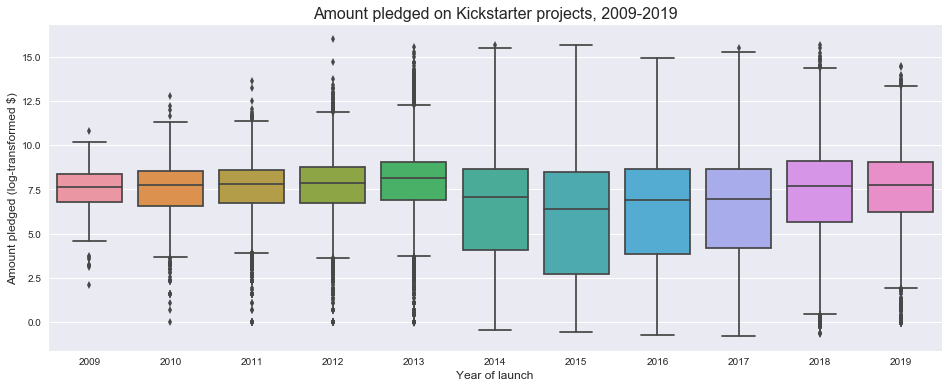

In [365]:
# Plotting the distribution of pledged amounts each year
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_pledged))
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Amount pledged (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2009-2019', fontsize=16)
plt.show()

The table and graph below are similar to the ones above, but for the goals of each project. The changes in goals show a similar pattern to the changes in the amounts pledged.

In [366]:
print("Average fundraising goal per project in each year, in $:")
print(round(df.set_index('launched_at').usd_goal.resample('YS').mean(),2))

Average fundraising goal per project in each year, in $:
launched_at
2009-01-01     3937.43
2010-01-01     5158.64
2011-01-01     6242.00
2012-01-01     9479.75
2013-01-01    14234.51
2014-01-01    40728.63
2015-01-01    68779.14
2016-01-01    50276.94
2017-01-01    49719.64
2018-01-01    19859.10
2019-01-01    16321.28
Freq: AS-JAN, Name: usd_goal, dtype: float64


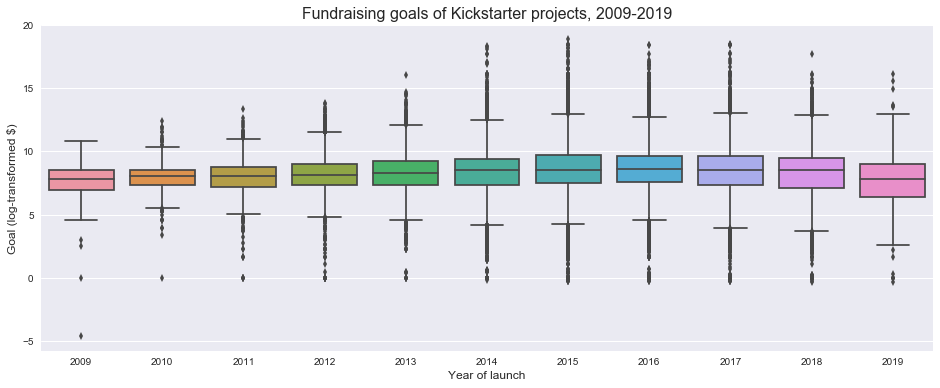

In [367]:
# Plotting the distribution of goal amounts each year
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_goal))
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Goal (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Fundraising goals of Kickstarter projects, 2009-2019', fontsize=16)
plt.show()

The graph below shows the number and proportion of failed and successful projects each year. Once again, there is a change from 2014. From 2009 to 2013, each year about 80% of projects were successful. However, this decreased from 2014, although since then it has mostly been rising again. 

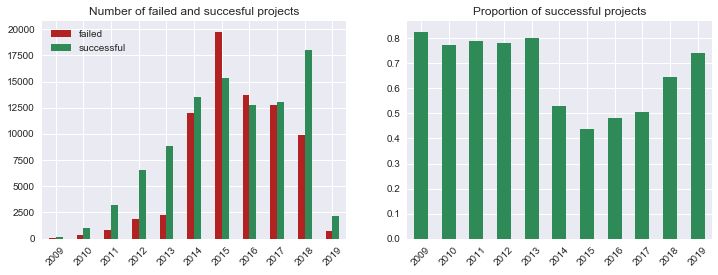

In [454]:
# Creating a dataframe grouped by year with columns for failed and successful
year_df = df.set_index('launched_at').state
year_df = pd.get_dummies(year_df).resample('YS').sum()

# Plotting the number and proportion of failed and successful projects each year
fig, ax = plt.subplots(1,2, figsize=(12,4))

year_df.plot.bar(ax=ax[0], color=['firebrick', 'seagreen'])
ax[0].set_title('Number of failed and succesful projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(list(range(2009,2020)), rotation=45)

year_df.div(year_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax[1], color='seagreen') # Normalizes counts across rows
ax[1].set_title('Proportion of successful projects')
ax[1].set_xlabel('')
ax[1].set_xticklabels(list(range(2009,2020)), rotation=45)

plt.show()

**What types of projects do people launch and which are more successful?**

There are 15 project categories, of which music is the most common, followed by film & video and art. Technology projects have the highest goals by far (in terms of their median goal size), followed by food (e.g. funding for restaurants), with other categories generally much smaller in terms of their funding goals. However, technology projects are towards the bottom of the leaderboard in terms of the median amount actually pledged. Games, comics, dance and design projects obtain the greatest amount of funding, on average (median). The most frequently succesful categories are comics and dance (probably at least partly due to their relatively small funding goals), while the least successful are food, journalism and technology (again, probably because of their large funding goals).

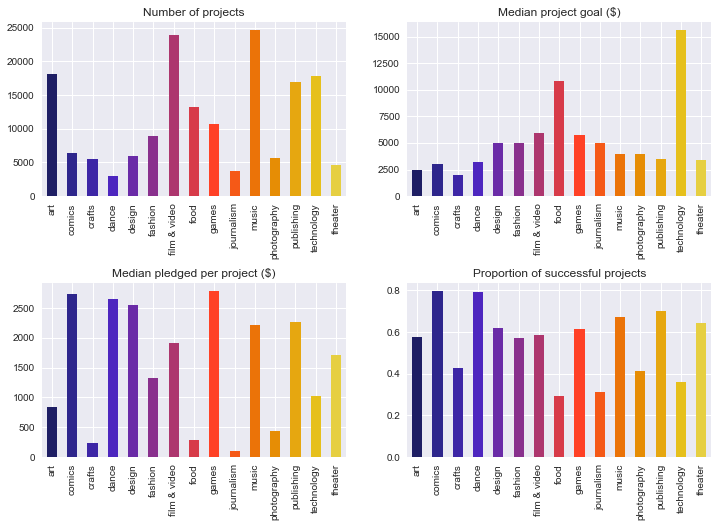

In [453]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))

color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

fig.subplots_adjust(hspace=0.5)
plt.show()

**Where do project owners come from and are some countries more successful than others?**

The vast majority of projects are from the US, with more than six times the total number of projects compared to the second most prolific country (the UK). Switzerland has the highest median project goal size, although the differences in mean goal sizes are less extreme. Projects from Hong Kong are the most successful, and attract considerably more money than projects from elsewhere - nearly twice the next most lucrative country (Japan).

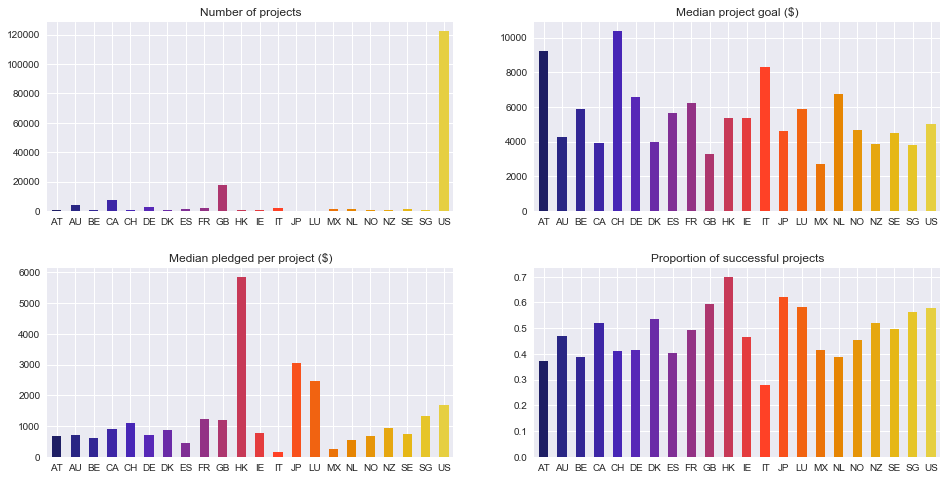

In [457]:
# Creating a dataframe grouped by country with columns for failed and successful
country_df = pd.get_dummies(df.set_index('country').state).groupby('country').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,8))

color = cm.CMRmap(np.linspace(0.1,0.8,df.country.nunique()))

df.groupby('country').country.count().plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('country').usd_goal.median().plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('country').usd_pledged.median().plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

country_df.div(country_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

**When is the best time to launch a project?**

Tuesday appears to be the best day to launch a project. It is the most popular launch day, and projects launched on Tuesday are slightly more succesful and attract more funding on average (median). Weekends (and to a lesser extent Fridays) are the least popular days to launch a project, have lower goals, attract less money and are slightly less successful.

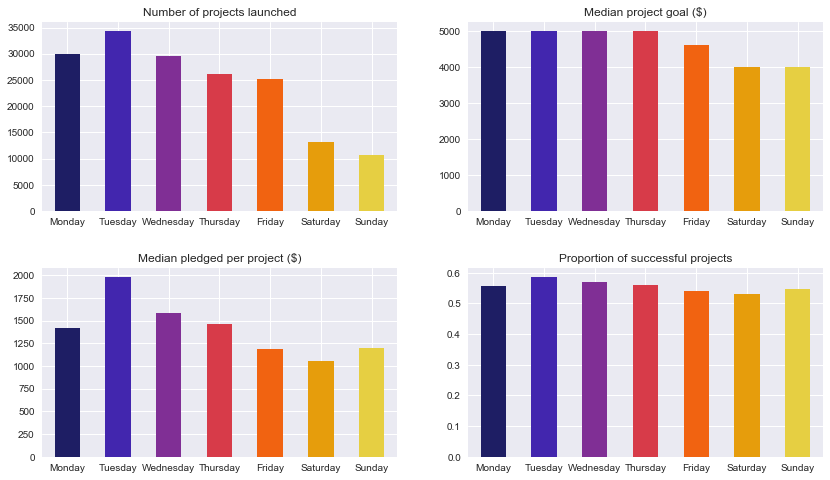

In [466]:
# Creating a dataframe grouped by the day on which they were launched, with columns for failed and successful
day_df = pd.get_dummies(df.set_index('launch_day').state).groupby('launch_day').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,8))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_day.nunique()))

df.groupby('launch_day').launch_day.count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')

df.groupby('launch_day').usd_goal.median().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('launch_day').usd_pledged.median().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

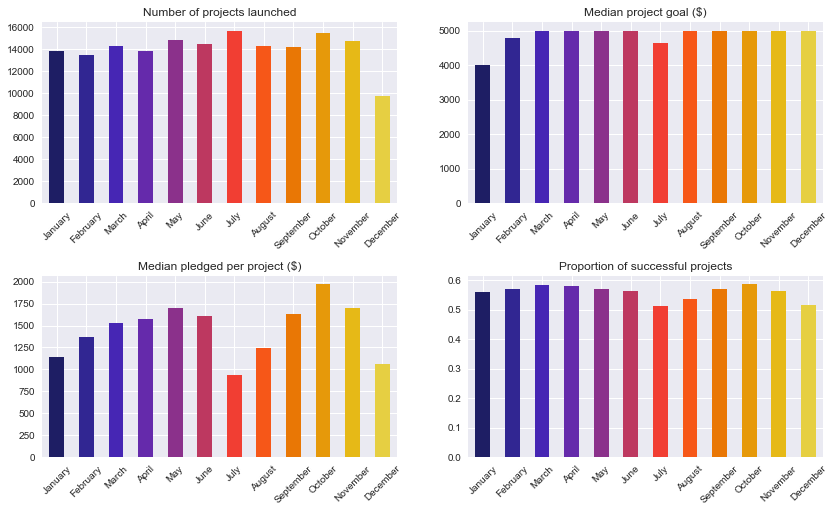

In [477]:
# Creating a dataframe grouped by the month in which they were launched, with columns for failed and successful
month_df = pd.get_dummies(df.set_index('launch_month').state).groupby('launch_month').sum()

# Plotting
months = list(calendar.month_name)[1:]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,8))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_month.nunique()))

df.groupby('launch_month').launch_month.count().reindex(months).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')

df.groupby('launch_month').usd_goal.median().reindex(months).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

month_df.div(month_df.sum(axis=1), axis=0).successful.reindex(months).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

fig.subplots_adjust(hspace=0.4)
plt.show()

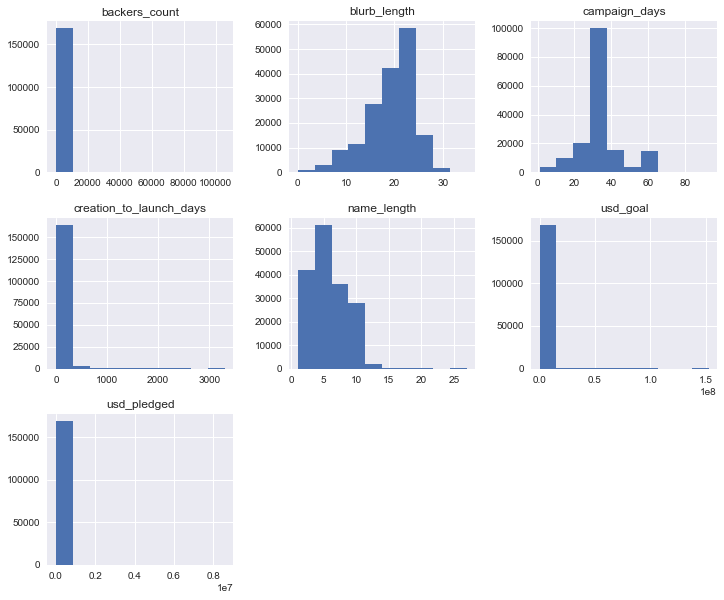

In [53]:
# Checking the distributions of continuous features
df[df.describe().columns].hist(figsize=(12,10));

Most continuous numerical features other than blurb_length and campaign_days are heavily positively skewed. However, this is not an issue for some machine learning models.

In [ ]:
# Before modelling, one-hot encode, check for multi-collinearity, transform (standardscaler or 0-1?) and save features minus dates and sub-category as new dataframe

***
# Modeling

***
# Interpretation

***
# Summary